In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates

from datetime import datetime

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv',parse_dates=True,index_col='Month')

In [3]:
df.index.freq = 'MS'

In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### Train-test split

In [7]:
len(df)

144

In [8]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [9]:
print(train_data.head())
print(test_data.head())

            Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121
            Thousands of Passengers
Month                              
1958-01-01                      340
1958-02-01                      318
1958-03-01                      362
1958-04-01                      348
1958-05-01                      363


In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [12]:
test_pred = fitted_model.forecast(36)

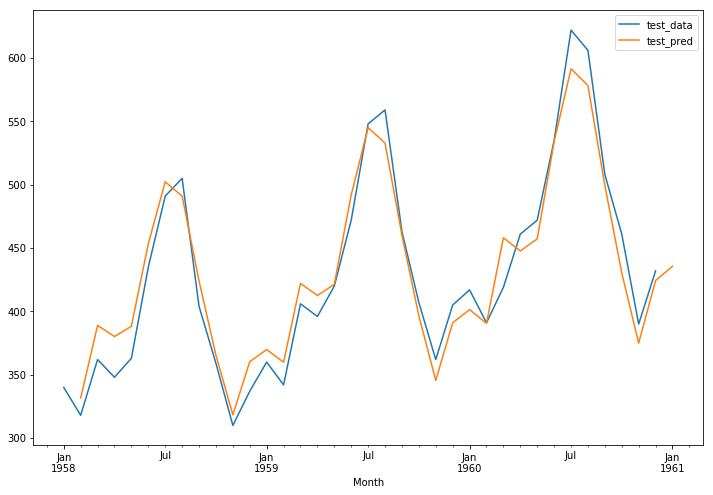

In [13]:
test_data['Thousands of Passengers'].plot(legend=True,label='test_data',figsize=(12,8))
test_pred.plot(legend=True,label='test_pred',figsize=(12,8))

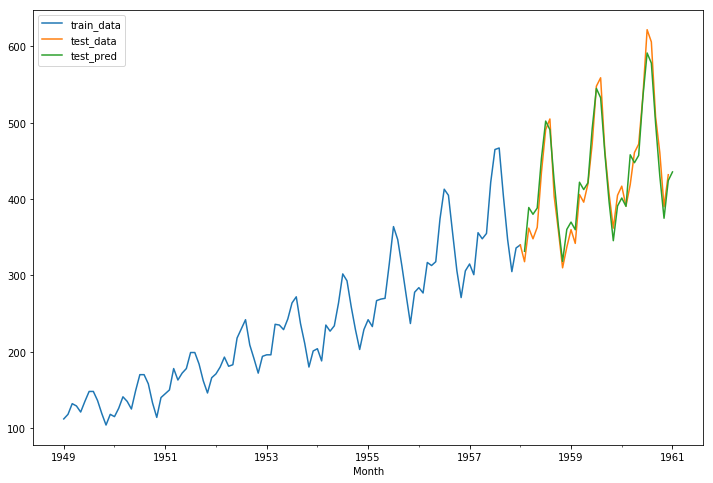

In [14]:
train_data['Thousands of Passengers'].plot(legend=True,label='train_data',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='test_data',figsize=(12,8))
test_pred.plot(legend=True,label='test_pred',figsize=(12,8))

### Evaluation metrics

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
def reg_eval_metrics (y_true,y_pred):
    
    from sklearn.metrics import mean_absolute_error,mean_squared_error
    
    MAE = mean_absolute_error(y_true=y_true,y_pred=y_pred)
    MSE = mean_squared_error(y_true=y_true,y_pred=y_pred)
    RMSE = np.sqrt(MSE)

    print ('MAE: ',MAE)
    print ('MSE: ',MSE)
    print ('RMSE: ',RMSE)

In [17]:
reg_eval_metrics(y_true=test_data,y_pred=test_pred)

MAE:  46.30290453876919
MSE:  3075.328464707026
RMSE:  55.45564411948549


In [18]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


### Forecast into the future

In [19]:
# Retrain the model for the entire dataset
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [20]:
final_forecast = final_model.forecast(36)

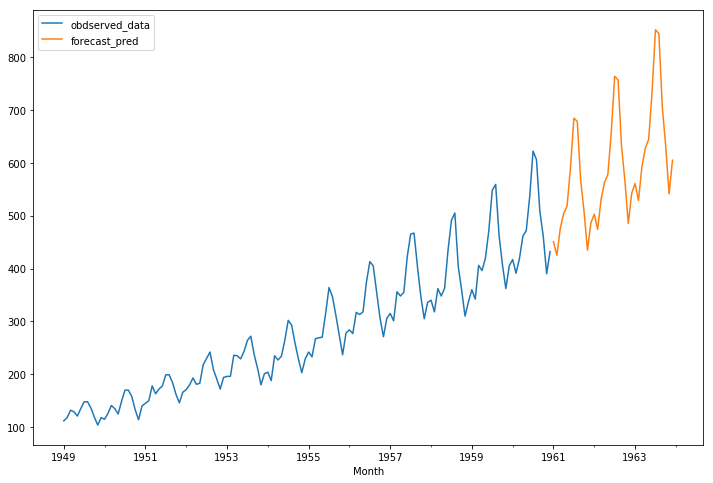

In [21]:
df['Thousands of Passengers'].plot(legend=True,label='obdserved_data',figsize=(12,8))
final_forecast.plot(legend=True,label='forecast_pred',figsize=(12,8))

### Stationary and non-stationary data

In [22]:
df2 = pd.read_csv('../Data/samples.csv',parse_dates=True, index_col=0)

In [23]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


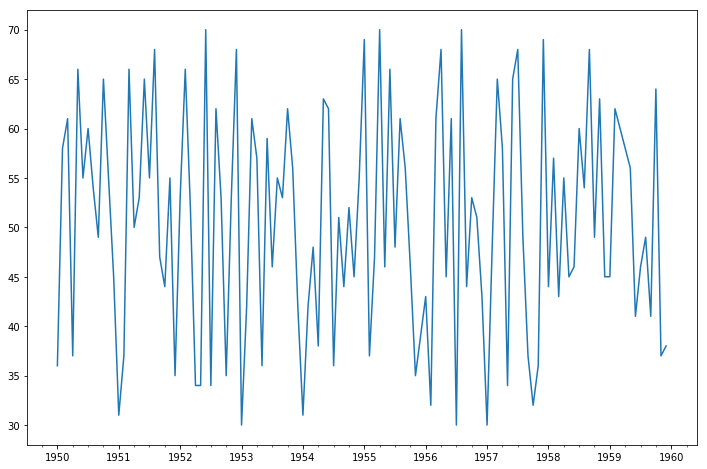

In [24]:
df2['a'].plot(figsize=(12,8))

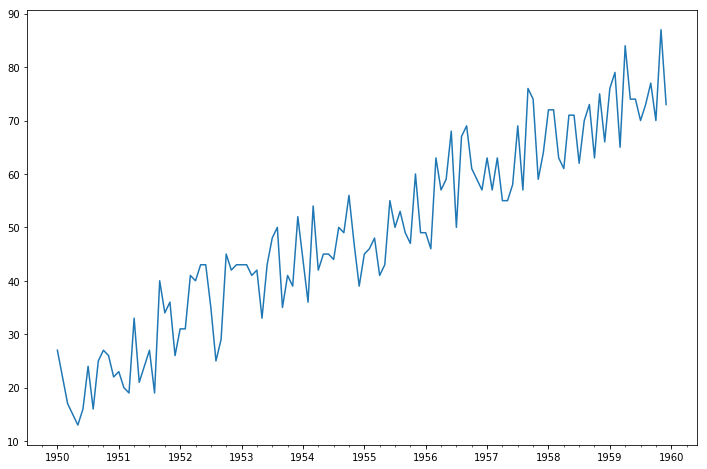

In [25]:
df2['b'].plot(figsize=(12,8))

In [26]:
from statsmodels.tsa.statespace.tools import diff

In [27]:
diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
1950-07-01     8.0
1950-08-01    -8.0
1950-09-01     9.0
1950-10-01     2.0
1950-11-01    -1.0
1950-12-01    -4.0
1951-01-01     1.0
1951-02-01    -3.0
1951-03-01    -1.0
1951-04-01    14.0
1951-05-01   -12.0
1951-06-01     3.0
1951-07-01     3.0
1951-08-01    -8.0
1951-09-01    21.0
1951-10-01    -6.0
1951-11-01     2.0
1951-12-01   -10.0
1952-01-01     5.0
1952-02-01     0.0
1952-03-01    10.0
1952-04-01    -1.0
1952-05-01     3.0
1952-06-01     0.0
1952-07-01    -8.0
              ... 
1957-07-01    11.0
1957-08-01   -12.0
1957-09-01    19.0
1957-10-01    -2.0
1957-11-01   -15.0
1957-12-01     5.0
1958-01-01     8.0
1958-02-01     0.0
1958-03-01    -9.0
1958-04-01    -2.0
1958-05-01    10.0
1958-06-01     0.0
1958-07-01    -9.0
1958-08-01     8.0
1958-09-01     3.0
1958-10-01   -10.0
1958-11-01    12.0
1958-12-01    -9.0
1959-01-01    10.0
1959-02-01     3.0
1959-03-01   -14.0
1959-04-01  

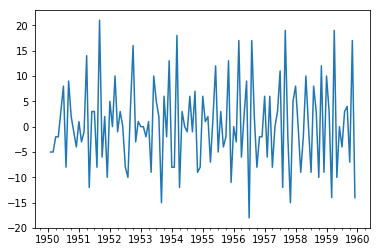

In [28]:
diff(df2['b'],k_diff=1).plot()

### ACF(Auto-Correlation Function) and PACF (Partial Auto-Correlation Function)

In [29]:
import statsmodels.api as sm

In [30]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [31]:
# Non-stationary data
df1 = pd.read_csv('../Data/airline_passengers.csv',parse_dates=True, index_col='Month')
df1.index.freq = 'MS'

# Stationary data
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',parse_dates=True, index_col='Date')
df2.index.freq = 'D'

In [32]:
print(df1.head())
print(df2.head())

            Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121
            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


In [33]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [35]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [36]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [37]:
pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [38]:
pacf_yw(df['a'],nlags=4,method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [39]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [40]:
from pandas.plotting import lag_plot

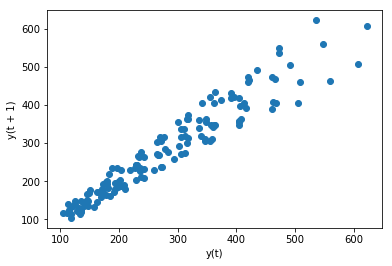

In [41]:
lag_plot(df1['Thousands of Passengers'])

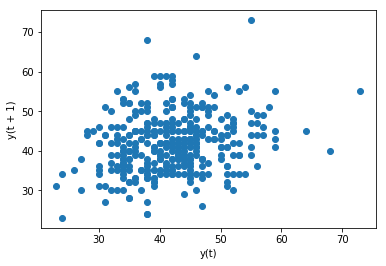

In [42]:
lag_plot(df2['Births'])

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

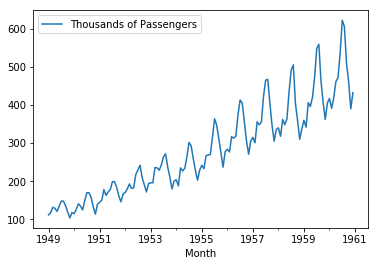

In [44]:
df1.plot()

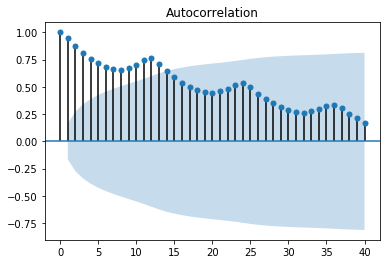

In [45]:
plot_acf(df1,lags=40);

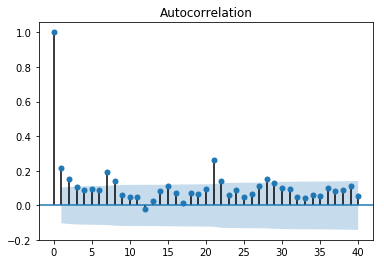

In [46]:
plot_acf(df2,lags=40);

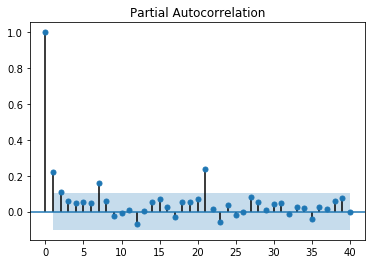

In [47]:
plot_pacf(df2,lags=40);

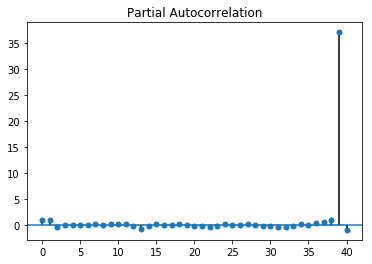

In [48]:
plot_pacf(df1,lags=40);